<a href="https://colab.research.google.com/github/Manel-MH/CodingDojo_Project2_HeartFailure/blob/main/Project2_Heart_Failure_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Drive

In [78]:
# mount your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [79]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

Part2

Load Data

About this data https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [80]:
#load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/heart_failure_clinical_records_dataset (1).csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Data Exploration

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [82]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [83]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Univariates Distributions with visualizations

Plot age frequency of patients

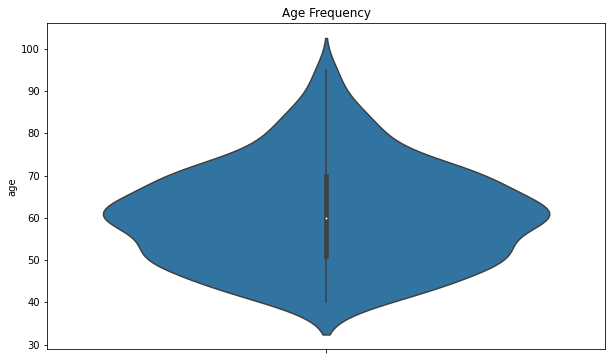

In [84]:
plt.figure(figsize=(10,6))
plt.title("Age Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["age"])
plt.show()

Boxplots to check for outliers

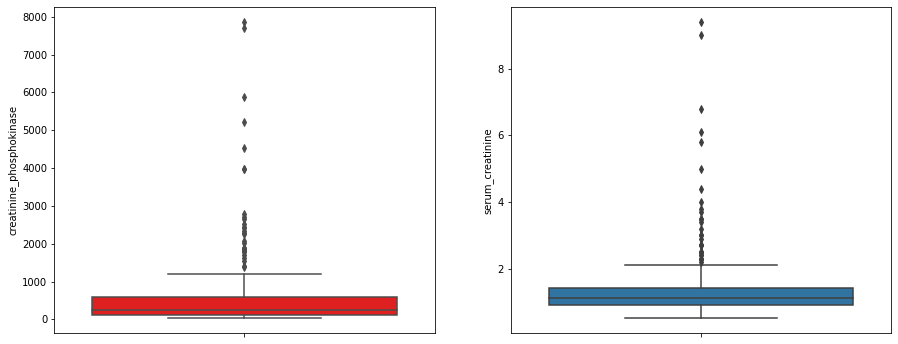

In [85]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df['creatinine_phosphokinase'], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df['serum_creatinine'])
plt.show()

These boxplots show the distribution range amongst the patients for creatinine_phosphokinase and serum_creatinine. The distribution is skewed towards lower end with outliers sitting on the higher end. These outliers seem possible if they are related to disease and outcome.

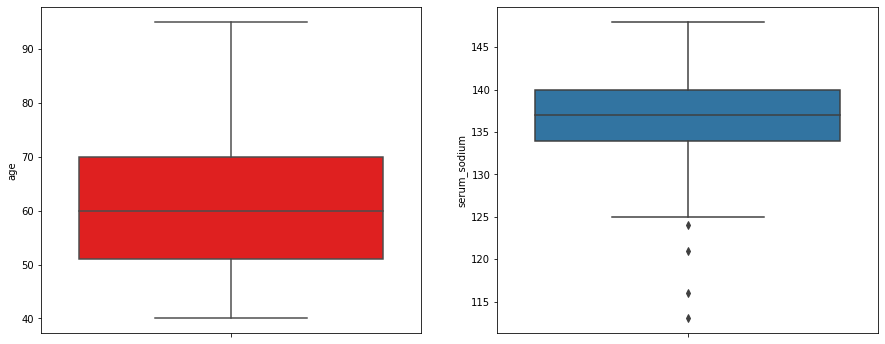

In [86]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df['age'], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df['serum_sodium'])
plt.show()

These boxplots show the distribution range amongst the patients for age and serum_sodium. The distribution for age looks good. The serum_sodium distribution is skewed toward higher end and there are some outliers in the lower end. These outliers seem possible if they are related to disease and outcome.

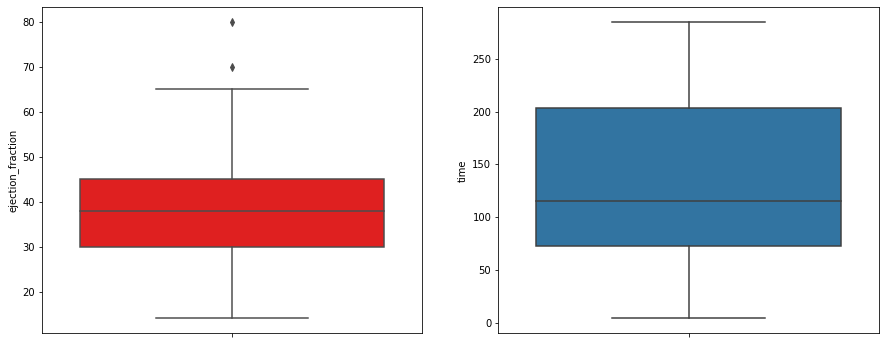

In [87]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df['ejection_fraction'], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df['time'])
plt.show()

These boxplots show the distribution range amongst the patients for ejection_fraction and time. Both distributions look good. The ejection_fraction outliers seem possible if they are related to disease and outcome.

Let's run a value count on each column to check for typos, mispelling and reporting errors.

In [88]:
#value counts
df['age'].value_counts()

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
72.000     7
42.000     7
40.000     7
85.000     6
62.000     5
68.000     5
52.000     5
49.000     4
61.000     4
51.000     4
73.000     4
59.000     4
46.000     3
64.000     3
82.000     3
90.000     3
69.000     3
95.000     2
48.000     2
60.667     2
67.000     2
44.000     2
66.000     2
77.000     2
78.000     2
54.000     2
57.000     2
94.000     1
56.000     1
41.000     1
87.000     1
79.000     1
86.000     1
43.000     1
81.000     1
47.000     1
Name: age, dtype: int64

In [89]:
df['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [90]:
df['creatinine_phosphokinase'].value_counts() 

582     47
66       4
129      4
84       3
231      3
        ..
395      1
754      1
2334     1
2695     1
514      1
Name: creatinine_phosphokinase, Length: 208, dtype: int64

In [91]:
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [92]:
df['ejection_fraction'].value_counts()

35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15     2
62     2
17     2
80     1
70     1
65     1
14     1
Name: ejection_fraction, dtype: int64

In [93]:
df['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [94]:
df['platelets'].value_counts()

263358.03    25
271000.00     4
221000.00     4
255000.00     4
228000.00     4
             ..
330000.00     1
217000.00     1
268000.00     1
358000.00     1
448000.00     1
Name: platelets, Length: 176, dtype: int64

In [95]:
df['serum_creatinine'].value_counts()

1.00    50
0.90    32
1.10    32
1.20    24
0.80    24
1.30    20
0.70    19
1.18    11
1.40     9
1.70     9
1.83     8
1.60     6
1.90     5
1.50     5
2.10     5
1.80     4
0.60     4
2.30     3
2.70     3
2.50     3
3.50     2
3.00     2
2.40     2
0.50     1
2.00     1
0.75     1
9.00     1
4.00     1
5.00     1
3.20     1
3.70     1
2.90     1
9.40     1
2.20     1
6.10     1
3.80     1
5.80     1
6.80     1
4.40     1
3.40     1
Name: serum_creatinine, dtype: int64

In [96]:
df['serum_sodium'].value_counts()

136    40
137    38
140    35
134    32
138    23
139    22
135    16
132    14
141    12
142    11
133    10
145     9
130     9
144     5
131     5
143     3
127     3
128     2
129     2
116     1
124     1
121     1
148     1
125     1
126     1
146     1
113     1
Name: serum_sodium, dtype: int64

In [97]:
df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [98]:
df['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [99]:
df['time'].value_counts()

187    7
250    7
186    6
107    6
10     6
      ..
135    1
140    1
148    1
150    1
4      1
Name: time, Length: 148, dtype: int64

In [100]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Let's run some descriptive statistics on the dataframe

In [101]:
#stats
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000
